___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Imports

In [1]:
import pandas as pd

# Sharpe Ratio
In this notebook you will implement the sharpe ratio for an examplar portfolio consisting of Apple and Microsoft

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

SR = (Mean portfolio return - risk free)/Standard deviation of portfolio return

$$ \text{Sharpe Ratio} = \frac{\text{Mean Portfolio Return} - \text{Risk free rate}} {\text{Standard deviation of portfolio return}}$$

Because of the (current) low yield on treasury bonds (https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield) the risk free return is very small. In fact, if accounting for inflation it is 0 (or even negative). Thus we set risk free rate to 0.<br />

This is the formula for a **daily** sharpe ratio.<br />
If you want to compute the sharpe ratio for a longer time period, you need to multiply the sharpe ratio with a factor K corresponding to the number of trading days in this period. <br />
(In fact you take the square root of this factor. The reason for this lies within the underlying sampling process. More information about this: https://quant.stackexchange.com/questions/2260/how-to-annualize-sharpe-ratio)

Annualized Sharpe Ratio = K * SR

K-values for various sampling rates (There are 252 trading days in a year):

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)



Read more: Sharpe Ratio https://www.investopedia.com/terms/s/sharperatio.asp

## Load stock data
At first we load the csv files containing the stock prices of X and Y for the last 5 years

In [6]:
aapl = pd.read_csv("apple.csv", index_col="Date", parse_dates=True)
msft = pd.read_csv("msft.csv", index_col="Date", parse_dates=True)

Let's inspect the data

In [7]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,26.752501,26.757500,26.205000,26.315001,24.266081,163649200
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.286833,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.678219,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.214844,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.235069,324377600


In [8]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,56.040001,56.189999,55.419998,55.480000,50.298279,27334100
2016-01-04,54.320000,54.799999,53.389999,54.799999,49.681782,53778000
2016-01-05,54.930000,55.389999,54.540001,55.049999,49.908432,34079700
2016-01-06,54.320000,54.400002,53.639999,54.049999,49.001839,39518900
2016-01-07,52.700001,53.490002,52.070000,52.169998,47.297417,56564900


## Compute Daily Returns
We can compute the daily return for both shares by computing the percentage change between the current adjusted price and the price one day before.
We can directly perform this task by using **pct_change(period)** provided by pandas

In [9]:
aapl["Daily Return"] = aapl["Adj Close"].pct_change(1)
msft["Daily Return"] = msft["Adj Close"].pct_change(1)

In [10]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2015-12-31,26.752501,26.757500,26.205000,26.315001,24.266081,163649200,NaN
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.286833,270597600,0.000855
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.678219,223164000,-0.025059
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.214844,273829600,-0.019570
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.235069,324377600,-0.042205


In [11]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2015-12-31,56.040001,56.189999,55.419998,55.480000,50.298279,27334100,NaN
2016-01-04,54.320000,54.799999,53.389999,54.799999,49.681782,53778000,-0.012257
2016-01-05,54.930000,55.389999,54.540001,55.049999,49.908432,34079700,0.004562
2016-01-06,54.320000,54.400002,53.639999,54.049999,49.001839,39518900,-0.018165
2016-01-07,52.700001,53.490002,52.070000,52.169998,47.297417,56564900,-0.034783


As the first row is now NaN we drop it:

In [12]:
aapl = aapl.dropna()
msft = msft.dropna()

## Computing standard deviation of Daily Returns
You can easily compute the std of the daily returns by using **std()**

In [13]:
aapl["Daily Return"].std(), msft["Daily Return"].std()

(0.018700009230664717, 0.017014492907230318)

## Combine everything to calculate the daily Sharpe Ratio

1. Compute mean daily return
2. Calculate STD
3. Compute daily sharpe ratio

In [15]:
def compute_sharpe_ratio(data, risk_free_rate=0):
  mean_return = data["Daily Return"].mean()
  std = data["Daily Return"].std()
  sharpe_ratio = (mean_return - risk_free_rate) / std
  
  # Daily SR
  return sharpe_ratio

  # Annual SR
  # return sharpe_ratio * (252 ** 0.5)

We can now compute the sharpe ratio for apple and microsoft

In [16]:
sr_apple = compute_sharpe_ratio(aapl)
sr_microsoft = compute_sharpe_ratio(msft)

print(f"The daily sharpe ratio for APPLE is {sr_apple} and {sr_microsoft} for MICROSOFT")

The daily sharpe ratio for APPLE is 0.07745264297924775 and 0.08222277302779334 for MICROSOFT


Now we can annualize this ratio by multiplying it with $\sqrt{252}$

In [17]:
annual_sr_apple = (252 ** 0.5) * sr_apple
annual_sr_microsoft = (252 ** 0.5) * sr_microsoft
print(f"The yearly sharpe ratio for APPLE is {annual_sr_apple} and {annual_sr_microsoft} for MICROSOFT")

# Microsoft has a higher sharpe ratio than Apple

The yearly sharpe ratio for APPLE is 1.2295225902465745 and 1.3052460572259028 for MICROSOFT


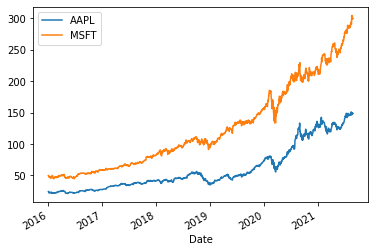

In [23]:
aapl['Adj Close'].plot(label="AAPL").legend()
msft['Adj Close'].plot(label="MSFT").legend()

## Sortino Ratio
In contrast to the sharpe ratio, the sortino ratio only punishes returns falling below a user defined threshold. Additionally, instead of inspecting the complete standard deviation, the sortino ratio only computes the *downside risk*, i.e the standard deviation of all returns which are smaller than the target

The flow is similar to the sharpe ratio:

1. Compute mean daily return
2. Calculate downside values by taking all daily returns smaller than the target
3. Compute standard deviation of downside
4. compute daily sortino ratio with the same formula as above

In [24]:
def compute_sortino_ratio(data, target, risk_free_rate=0):
  mean_return = data["Daily Return"].mean()
  
  # VOLATILITY (THRESHOLD)
  # T=0 ==> NEGATIVE DAILY RETURN
  downside = data[data["Daily Return"] < target]["Daily Return"]
  
  std = downside.std()
  sortino_ratio = (mean_return - risk_free_rate) / std

  # Annually SR
  return sortino_ratio * (252 ** 0.5)

In [25]:
sr_apple = compute_sortino_ratio(aapl, target=0)
sr_microsoft = compute_sortino_ratio(msft, target=0)

print(f"The daily sortino ratio for APPLE is {sr_apple} and {sr_microsoft} for MICROSOFT")

The daily sortino ratio for APPLE is 1.613582243456224 and 1.695151173199415 for MICROSOFT


In [26]:
annual_sr_apple = (252 ** 0.5) * sr_apple
annual_sr_microsoft = (252 ** 0.5) * sr_microsoft
print(f"The yearly sortino ratio for APPLE is {annual_sr_apple} and {annual_sr_microsoft} for MICROSOFT")

# Microsoft still has a better performance than Apple

The yearly sortino ratio for APPLE is 25.614824016809088 and 26.90969063367019 for MICROSOFT


## Probabilistic Sharpe Ratio

The problem of the sharpe ratio is, that it is calculated via historical data and thus it only yields an estimation and not the true sharpe ratio!

To tackle this problem you can use the *Probabilistic Sharpe Ratio* 
It is defined as 
$$ \text{cdf} \Big( \frac{(\widehat{\text{SR}} - SR^*)}{\widehat{\sigma}({\widehat{SR})}} \Big)$$
where cdf is the cummulative density function of the normal function, <br />
$\widehat{SR}$ is the original sharpe ratio,<br />
$SR^*$ is the benchmark sharpe ratio (often 0), <br />
and $\hat{\sigma}(\widehat{SR})$ is the standard deviation of the estimated sharpe ratio which is computed as follows:

$$ \hat{\sigma}(\hat{SR}) = \sqrt{\frac{1}{n-1} \Big (1 + \frac{1}{2} \widehat{\text{SR}}^2 - \gamma_3 \hat{\text{SR}} + \frac{\gamma_4}{4} \widehat{\text{SR}}^2 \Big )} $$

Here, $\gamma_3$ and $\gamma_4$ correspond to skew and fisher kurtosis.

In words, the probabilistic sharpe ratio computes the propability that the true sharpe ratio is $\leq$ the estimated sharpe ratio ($PSR = P(SR \leq \widehat{\text{SR}})$) given the benchmark sharpe ratio.

To compute skew kurtosis and cdf, we can use scipy.stats

In [28]:
import scipy.stats

In [29]:
def compute_prob_sharpe_ratio(data, benchmark=0):
  sr = compute_sharpe_ratio(data, 0)

  skew = scipy.stats.skew(data["Daily Return"])
  # Use fisher kurtosis
  kurtosis = scipy.stats.kurtosis(data["Daily Return"], fisher=True)

  n = len(data)
  std = ((1 / (n - 1)) * (1 + 0.5 * sr ** 2 - skew * sr + (kurtosis / 4) * sr ** 2)) ** 0.5
  ratio = (sr - benchmark) / std
  prob_sharpe_ratio = scipy.stats.norm.cdf(ratio)

  return prob_sharpe_ratio

In [30]:
sr_apple = compute_prob_sharpe_ratio(aapl)
sr_microsoft = compute_prob_sharpe_ratio(msft)

print(f"The daily probabilistic sharpe ratio for APPLE is {sr_apple} and {sr_microsoft} for MICROSOFT")

# Microsoft and Apple have nearly the same performance

The daily probabilistic sharpe ratio for APPLE is 0.9980881565955385 and 0.9989135272403051 for MICROSOFT


In [31]:
annual_sr_apple = (252 ** 0.5) * sr_apple
annual_sr_microsoft = (252 ** 0.5) * sr_microsoft
print(f"The annual probabilistic sharpe ratio for APPLE is {annual_sr_apple} and {annual_sr_microsoft} for MICROSOFT")

The annual probabilistic sharpe ratio for APPLE is 15.844158293224119 and 15.857260646017153 for MICROSOFT
